In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Load**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/corona project/america.csv')

In [ ]:
df.head()

,date,new case,death
0,9/27/2020,49548,763
1,9/28/2020,41403,672
2,9/29/2020,34943,498
3,9/30/2020,38686,401
4,10/1/2020,39753,794


In [ ]:
df.tail()

,date,new case,death
414,11/15/2021,58690,443
415,11/16/2021,23093,117
416,11/17/2021,151953,1157
417,11/18/2021,98324,1567
418,11/19/2021,105962,1711


In [ ]:
df1=df.reset_index()['death']

In [ ]:
df1

0       763
1       672
2       498
3       401
4       794
       ... 
414     443
415     117
416    1157
417    1567
418    1711
Name: death, Length: 419, dtype: int64

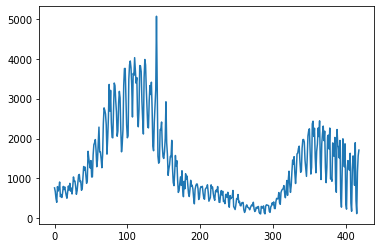

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

# **Data Preprocessing**

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[1.31759483e-01]
 [1.13397902e-01]
 [7.82889427e-02]
 [5.87167070e-02]
 [1.38014528e-01]
 [1.15617433e-01]
 [1.28732849e-01]
 [1.61420500e-01]
 [8.69652946e-02]
 [9.78611784e-02]
 [8.31315577e-02]
 [1.05125101e-01]
 [1.39225182e-01]
 [1.23284907e-01]
 [1.36400323e-01]
 [1.15012107e-01]
 [9.40274415e-02]
 [7.92978208e-02]
 [1.10371267e-01]
 [1.40839387e-01]
 [1.20863600e-01]
 [1.54560129e-01]
 [1.15213882e-01]
 [1.30750605e-01]
 [1.00887813e-01]
 [1.37610977e-01]
 [1.87046005e-01]
 [1.64447135e-01]
 [1.66464891e-01]
 [1.37610977e-01]
 [9.92736077e-02]
 [1.17635190e-01]
 [1.58192090e-01]
 [1.95318805e-01]
 [1.99757869e-01]
 [1.62832930e-01]
 [1.66061340e-01]
 [1.19451170e-01]
 [1.27723971e-01]
 [1.88054883e-01]
 [2.39709443e-01]
 [2.21146086e-01]
 [2.36682809e-01]
 [1.93704600e-01]
 [1.54560129e-01]
 [1.69087974e-01]
 [3.16787732e-01]
 [2.82082324e-01]
 [2.53833737e-01]
 [2.32243745e-01]
 [2.69774011e-01]
 [1.86844229e-01]
 [1.87449556e-01]
 [2.98022599e-01]
 [3.50282486e-01]
 [3.603712

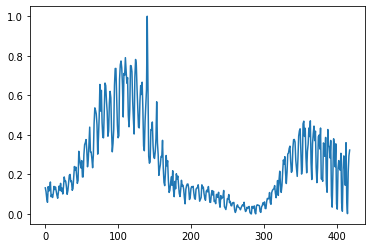

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(272, 147)

In [ ]:
train_data

array([[0.13175948],
       [0.1133979 ],
       [0.07828894],
       [0.05871671],
       [0.13801453],
       [0.11561743],
       [0.12873285],
       [0.1614205 ],
       [0.08696529],
       [0.09786118],
       [0.08313156],
       [0.1051251 ],
       [0.13922518],
       [0.12328491],
       [0.13640032],
       [0.11501211],
       [0.09402744],
       [0.07929782],
       [0.11037127],
       [0.14083939],
       [0.1208636 ],
       [0.15456013],
       [0.11521388],
       [0.13075061],
       [0.10088781],
       [0.13761098],
       [0.187046  ],
       [0.16444713],
       [0.16646489],
       [0.13761098],
       [0.09927361],
       [0.11763519],
       [0.15819209],
       [0.19531881],
       [0.19975787],
       [0.16283293],
       [0.16606134],
       [0.11945117],
       [0.12772397],
       [0.18805488],
       [0.23970944],
       [0.22114609],
       [0.23668281],
       [0.1937046 ],
       [0.15456013],
       [0.16908797],
       [0.31678773],
       [0.282

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(261, 10)
(261,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(136, 10)
(136,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **Stacked LSTM**

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_6 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 9s 232ms/step - loss: 0.0776 - val_loss: 0.0237
Epoch 2/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0329 - val_loss: 0.0117
Epoch 3/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0231 - val_loss: 0.0103
Epoch 4/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0157 - val_loss: 0.0101
Epoch 5/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0141 - val_loss: 0.0082
Epoch 6/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0111 - val_loss: 0.0088
Epoch 7/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0097 - val_loss: 0.0082
Epoch 8/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0105 - val_loss: 0.0098
Epoch 9/100
9/9 [==============================] - 0s 29ms/step - loss: 0.0113 - val_loss: 0.0082
Epoch 10/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 11/100
9/9 [

# **Prediction**

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
import math
from sklearn.metrics import mean_squared_error


In [ ]:
### Train Data MSE
mean_squared_error(y_train,train_predict)

2878729.6711062994

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1553457.6184621577

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1696.6819593271744

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1246.3777992495525

## **MAE**

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_predict)

1397.725596723083

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

1081.0148575644273

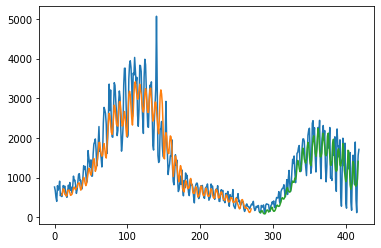

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

147

In [ ]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape


(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

10

In [ ]:
temp_input

[0.2263922518159806,
 0.2935835351089588,
 0.2512106537530266,
 0.14487489911218723,
 0.36037126715092815,
 0.06719128329297822,
 0.0014124293785310743,
 0.21125907990314768,
 0.2939870863599677,
 0.3230427764326069]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



[0.17153394]
11
1 day input [0.29358354 0.25121065 0.1448749  0.36037127 0.06719128 0.00141243
 0.21125908 0.29398709 0.32304278 0.17153394]
1 day output [[0.13499358]]
2 day input [0.25121065 0.1448749  0.36037127 0.06719128 0.00141243 0.21125908
 0.29398709 0.32304278 0.17153394 0.13499358]
2 day output [[0.14152698]]
3 day input [0.1448749  0.36037127 0.06719128 0.00141243 0.21125908 0.29398709
 0.32304278 0.17153394 0.13499358 0.14152698]
3 day output [[0.16550368]]
4 day input [0.36037127 0.06719128 0.00141243 0.21125908 0.29398709 0.32304278
 0.17153394 0.13499358 0.14152698 0.16550368]
4 day output [[0.15621798]]
5 day input [0.06719128 0.00141243 0.21125908 0.29398709 0.32304278 0.17153394
 0.13499358 0.14152698 0.16550368 0.15621798]
5 day output [[0.2578478]]
6 day input [0.00141243 0.21125908 0.29398709 0.32304278 0.17153394 0.13499358
 0.14152698 0.16550368 0.15621798 0.25784779]
6 day output [[0.25124207]]
7 day input [0.21125908 0.29398709 0.32304278 0.17153394 0.13499358

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

419

In [ ]:
len(lst_output)

30

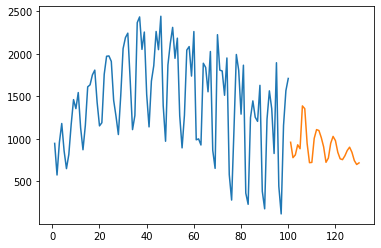

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

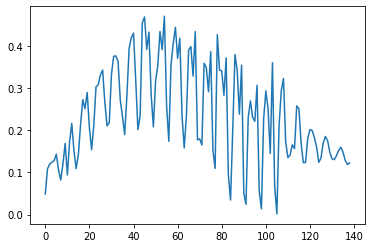

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

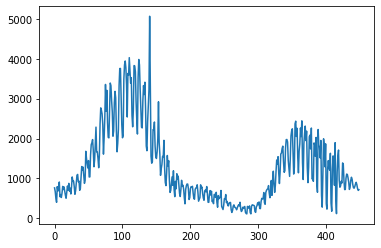

In [ ]:
plt.plot(df3)

# **Bidirectional LSTM**

In [ ]:
from keras.layers import Bidirectional
model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(10,1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 111ms/step - loss: 0.1181 - val_loss: 0.0354
Epoch 2/100
9/9 [==============================] - 1s 60ms/step - loss: 0.0606 - val_loss: 0.0142
Epoch 3/100
9/9 [==============================] - 1s 57ms/step - loss: 0.0247 - val_loss: 0.0121
Epoch 4/100
9/9 [==============================] - 1s 63ms/step - loss: 0.0168 - val_loss: 0.0137
Epoch 5/100
9/9 [==============================] - 1s 60ms/step - loss: 0.0131 - val_loss: 0.0085
Epoch 6/100
9/9 [==============================] - 1s 57ms/step - loss: 0.0107 - val_loss: 0.0081
Epoch 7/100
9/9 [==============================] - 1s 57ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 8/100
9/9 [==============================] - 1s 60ms/step - loss: 0.0089 - val_loss: 0.0083
Epoch 9/100
9/9 [==============================] - 1s 58ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 10/100
9/9 [==============================] - 1s 66ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 11/100
9/9 [

In [ ]:
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
mean_squared_error(y_train,train_predict)

3037015.743481486

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1673664.4084953687

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

1742.703573038595

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1293.701823642283

## **MAE**

In [ ]:
mean_absolute_error(y_train,train_predict)

1423.145705825179

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

1123.0446196641983

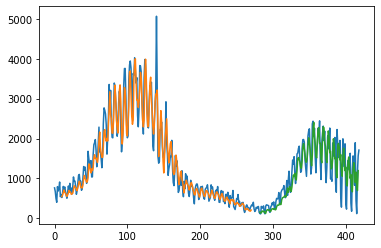

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.24271217]
11
1 day input [0.29358354 0.25121065 0.1448749  0.36037127 0.06719128 0.00141243
 0.21125908 0.29398709 0.32304278 0.24271217]
1 day output [[0.19251566]]
2 day input [0.25121065 0.1448749  0.36037127 0.06719128 0.00141243 0.21125908
 0.29398709 0.32304278 0.24271217 0.19251566]
2 day output [[0.16654038]]
3 day input [0.1448749  0.36037127 0.06719128 0.00141243 0.21125908 0.29398709
 0.32304278 0.24271217 0.19251566 0.16654038]
3 day output [[0.1655873]]
4 day input [0.36037127 0.06719128 0.00141243 0.21125908 0.29398709 0.32304278
 0.24271217 0.19251566 0.16654038 0.16558731]
4 day output [[0.17504993]]
5 day input [0.06719128 0.00141243 0.21125908 0.29398709 0.32304278 0.24271217
 0.19251566 0.16654038 0.16558731 0.17504993]
5 day output [[0.2348604]]
6 day input [0.00141243 0.21125908 0.29398709 0.32304278 0.24271217 0.19251566
 0.16654038 0.16558731 0.17504993 0.23486041]
6 day output [[0.26025245]]
7 day input [0.21125908 0.29398709 0.32304278 0.24271217 0.19251566 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

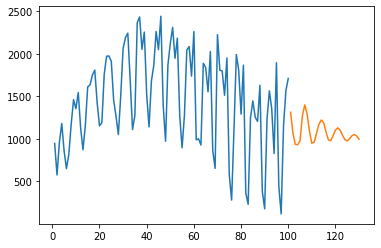

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

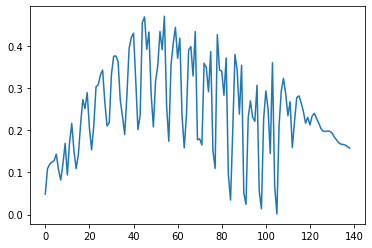

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

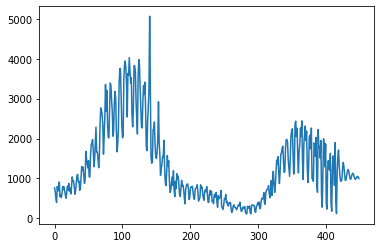

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# **Vanilla LSTM**

In [ ]:
model3 = Sequential()
model3.add(LSTM(50, activation='relu', input_shape=(10, 1)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 73ms/step - loss: 0.0894 - val_loss: 0.0333
Epoch 2/100
9/9 [==============================] - 0s 31ms/step - loss: 0.0554 - val_loss: 0.0171
Epoch 3/100
9/9 [==============================] - 0s 39ms/step - loss: 0.0263 - val_loss: 0.0103
Epoch 4/100
9/9 [==============================] - 0s 34ms/step - loss: 0.0158 - val_loss: 0.0151
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 0.0141 - val_loss: 0.0097
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0120 - val_loss: 0.0090
Epoch 7/100
9/9 [==============================] - 0s 34ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 8/100
9/9 [==============================] - 0s 33ms/step - loss: 0.0101 - val_loss: 0.0085
Epoch 9/100
9/9 [==============================] - 0s 33ms/step - loss: 0.0095 - val_loss: 0.0083
Epoch 10/100
9/9 [==============================] - 0s 33ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 11/100
9/9 [=

# **Prediction**

In [ ]:
train_predict=model3.predict(X_train)
test_predict=model3.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
mean_squared_error(y_train,train_predict)

2872626.5076124268

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1603366.8981377408

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

1694.8824465467883

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1266.2412480004514

## **MAE**

In [ ]:
mean_absolute_error(y_train,train_predict)

1399.0772732547616

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

1112.6291641826128

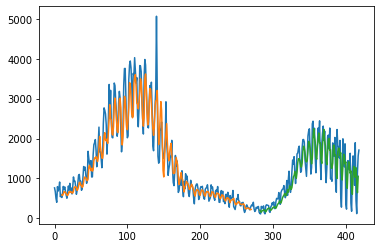

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.25236848]
11
1 day input [0.29358354 0.25121065 0.1448749  0.36037127 0.06719128 0.00141243
 0.21125908 0.29398709 0.32304278 0.25236848]
1 day output [[0.22223254]]
2 day input [0.25121065 0.1448749  0.36037127 0.06719128 0.00141243 0.21125908
 0.29398709 0.32304278 0.25236848 0.22223254]
2 day output [[0.20601746]]
3 day input [0.1448749  0.36037127 0.06719128 0.00141243 0.21125908 0.29398709
 0.32304278 0.25236848 0.22223254 0.20601746]
3 day output [[0.18543237]]
4 day input [0.36037127 0.06719128 0.00141243 0.21125908 0.29398709 0.32304278
 0.25236848 0.22223254 0.20601746 0.18543237]
4 day output [[0.17051984]]
5 day input [0.06719128 0.00141243 0.21125908 0.29398709 0.32304278 0.25236848
 0.22223254 0.20601746 0.18543237 0.17051984]
5 day output [[0.20965762]]
6 day input [0.00141243 0.21125908 0.29398709 0.32304278 0.25236848 0.22223254
 0.20601746 0.18543237 0.17051984 0.20965762]
6 day output [[0.23607899]]
7 day input [0.21125908 0.29398709 0.32304278 0.25236848 0.2222325

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)   

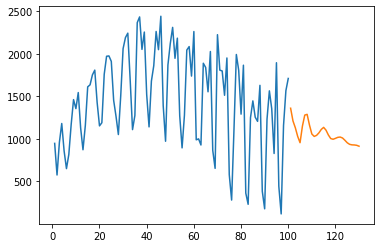

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

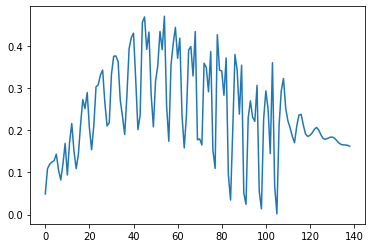

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

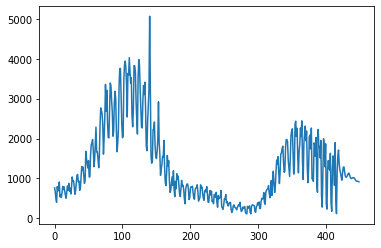

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# **ConvLSTM1D**

In [ ]:
X_train = X_train.reshape((261, 1, 10, 1))
X_test = X_test.reshape((136, 1, 10, 1))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model4 = Sequential()
model4.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None,10,1)))
model4.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model4.add(TimeDistributed(Flatten()))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 10, 64)     128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 5, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 320)        0         
 tributed)                                                       
                                                                 
 lstm_10 (LSTM)              (None, 50)                74200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                      

In [ ]:
model4.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 8s 54ms/step - loss: 0.1090 - val_loss: 0.0379
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0546 - val_loss: 0.0156
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0177 - val_loss: 0.0111
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0140 - val_loss: 0.0113
Epoch 5/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0106 - val_loss: 0.0090
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 9/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 10/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 11/100
9/9 [=

# **Predection**

In [ ]:
train_predict=model4.predict(X_train)
test_predict=model4.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
mean_squared_error(y_train,train_predict)

3096824.0809040074

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1761885.152869179

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

1759.7795546329112

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1327.3602197102257

## **MAE**

In [ ]:
mean_absolute_error(y_train,train_predict)

1455.5232322363306

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

1181.650851297553

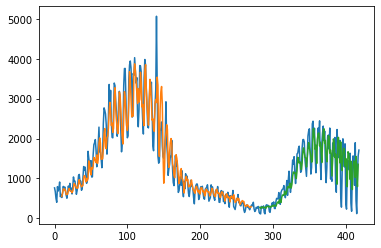

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.2263922518159806,
 0.2935835351089588,
 0.2512106537530266,
 0.14487489911218723,
 0.36037126715092815,
 0.06719128329297822,
 0.0014124293785310743,
 0.21125907990314768,
 0.2939870863599677,
 0.3230427764326069]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1, n_steps, 1))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps,1))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.28653428]
11
1 day input [0.29358354 0.25121065 0.1448749  0.36037127 0.06719128 0.00141243
 0.21125908 0.29398709 0.32304278 0.28653428]
1 day output [[0.23447976]]
2 day input [0.25121065 0.1448749  0.36037127 0.06719128 0.00141243 0.21125908
 0.29398709 0.32304278 0.28653428 0.23447976]
2 day output [[0.2675992]]
3 day input [0.1448749  0.36037127 0.06719128 0.00141243 0.21125908 0.29398709
 0.32304278 0.28653428 0.23447976 0.2675992 ]
3 day output [[0.15878749]]
4 day input [0.36037127 0.06719128 0.00141243 0.21125908 0.29398709 0.32304278
 0.28653428 0.23447976 0.2675992  0.15878749]
4 day output [[0.22072393]]
5 day input [0.06719128 0.00141243 0.21125908 0.29398709 0.32304278 0.28653428
 0.23447976 0.2675992  0.15878749 0.22072393]
5 day output [[0.2776075]]
6 day input [0.00141243 0.21125908 0.29398709 0.32304278 0.28653428 0.23447976
 0.2675992  0.15878749 0.22072393 0.2776075 ]
6 day output [[0.28163454]]
7 day input [0.21125908 0.29398709 0.32304278 0.28653428 0.23447976 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)   

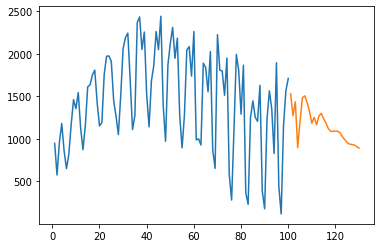

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

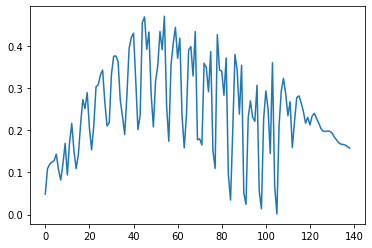

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

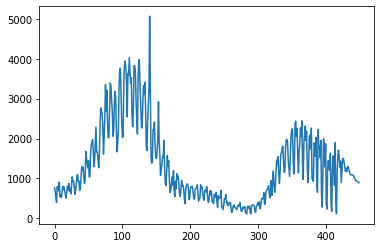

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)